<a href="https://colab.research.google.com/github/Maryd9/Clustering-and-classification/blob/main/%D0%A1%D0%9F%D0%9F%D0%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret[full]==2.3.4
!pip install seaborn==0.9.0
!pip install statistics==3.4.0b3
!pip install sklearn==0.24.0
from matplotlib import pyplot as plt
import seaborn as sns
import numpy
from pycaret.clustering import *
from sklearn.preprocessing import MinMaxScaler
from statistics import mean
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.neighbors import KNeighborsClassifier  # kNN
from google.colab import files

# Установка датасета

*   Pregnancies количество беременностей
*   GlucosePlasma концентрация глюкозы в плазме через 2 часа после приема сахара
*   BloodPressureDiastolic кровяное давление (mm Hg)
*   SkinThicknessTriceps толщина кожи (mm)
*   Insulin2-Hour уровень инсулина (mu U/ml)
*   BMIBody индекс массы тела (weight in kg/(height in m)^2)
*   DiabetesPedigreeFunctionDiabetes генетическая предростоположенность к диабету
*   Age возраст в годах
*   Outcome зависимая переменная (0 или 1), будет ли человек болеть диабетом







In [ ]:
files.upload()
df = pd.read_csv(r"diabetes.csv")  
print("Загруженные данные в датафрейм:")
print(df.head(10).to_string())

Saving diabetes.csv to diabetes (2).csv
Загруженные данные в датафрейм:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0  33.6                     0.627   50        1
1            1       85             66             29        0  26.6                     0.351   31        0
2            8      183             64              0        0  23.3                     0.672   32        1
3            1       89             66             23       94  28.1                     0.167   21        0
4            0      137             40             35      168  43.1                     2.288   33        1
5            5      116             74              0        0  25.6                     0.201   30        0
6            3       78             50             32       88  31.0                     0.248   26        1
7           10      115              0              0   

# Обучение без учителя. Кластеризация

In [ ]:
df_num = df.copy()

Удаление колонок, где много пропусков

In [ ]:
# Удаление колонок, где много пропусков
df_num.dropna(axis=1, inplace=True, thresh=len(df_num) * 0.95)

In [ ]:
# Восстановление пропусков медианой
for i in df_num:
  # Процент пропусков
  nan_proc = df_num[i].isna().sum() / len(df_num) * 100
  if nan_proc > 0:
    # Заполнение пропусков
    df_num.loc[df_num[i].isna(), i] = df_num[i].median()

In [ ]:
# Нормализация
for i in df_num:
  df_num[i] = MinMaxScaler().fit_transform(df_num[[i]])
print("\nНормализованный датафрейм:")
print(df_num.head(10).to_string())


Нормализованный датафрейм:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  DiabetesPedigreeFunction       Age  Outcome
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745                  0.234415  0.483333      1.0
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423                  0.116567  0.166667      0.0
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243                  0.253629  0.183333      1.0
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778                  0.038002  0.000000      0.0
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325                  0.943638  0.200000      1.0
5     0.294118  0.582915       0.606557       0.000000  0.000000  0.381520                  0.052519  0.150000      0.0
6     0.176471  0.391960       0.409836       0.323232  0.104019  0.461997                  0.072588  0.083333      1.0
7     0.5882

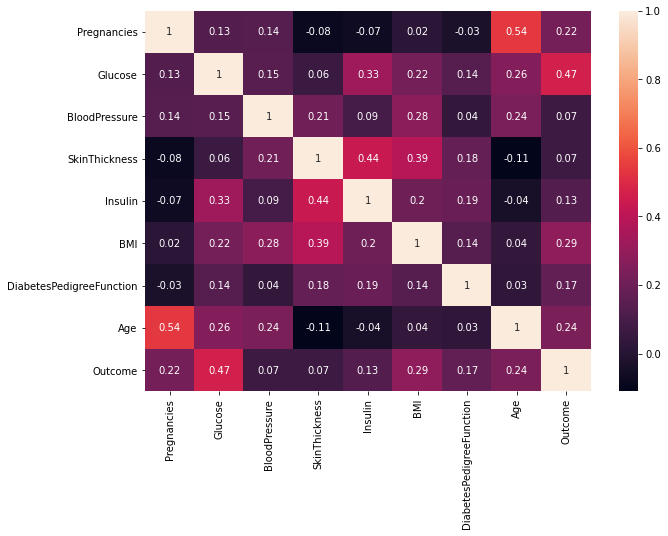

In [ ]:
# Тепловая карата, показывающая значения корреляции всех пар переменных
plt.figure(figsize=(10, 7))
sns.heatmap(df_num.corr().round(decimals=2), annot=True)
plt.show()

In [ ]:
# Выбор переменных для создания кластеров
X = df_num.iloc[:,0:8]

In [ ]:
# Создание пайплайна(визуализации), который подготовит данные для обучения и развертывания модели
# В конце необходимо нажать Enter
cluster = setup(df_num, session_id = 7652)

,Description,Value
0,session_id,7652
1,Original Data,"(768, 9)"
2,Missing Values,False
3,Numeric Features,8
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(768, 10)"
9,CPU Jobs,-1


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
        

In [ ]:
# Разбиение на кластеры
# Полученное значение метрики — это средний коэффициент Silhouette для всех экземпляров, 
# имеющий диапазон от -1 до 1. Отрицательные значения указывают на то, что экземпляр был определен в неправильный кластер,
# а значения, близкие к 0, указывают на то, что кластеры перекрываются. 
# С другой стороны, положительные значения, близкие к 1, указывают на правильное распределение.

model = create_model('kmeans', num_clusters=2)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6284,1835.277,0.589,0,0,0


INFO:logs:create_model_container: 1
INFO:logs:master_model_container: 1
INFO:logs:display_container: 2
INFO:logs:KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=7652, tol=0.0001, verbose=0)
INFO:logs:create_model() succesfully completed......................................


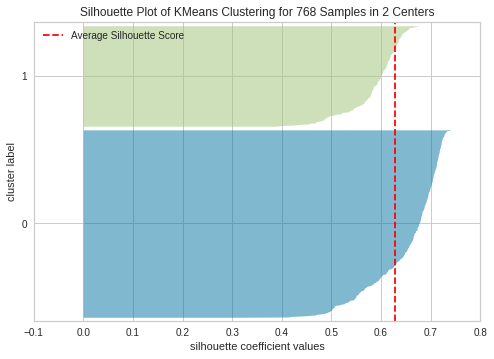

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(model, 'silhouette')

In [ ]:
#Построение графика модели
plot_model(model, plot = 'cluster') 

INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
# Вывод датасета, с отнесением каждого примера к кластеру
save_model(model, 'clustering_model')
results = assign_model(model)
results.head(10)

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=7652, tol=0.0001, verbose=0), model_name=clustering_model, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_numerical=None...
                ('

Transformation Pipeline and Model Successfully Saved


INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=7652, tol=0.0001, verbose=0), transformation=False, score=True, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Determining Trained Model
INFO:logs:Trained Model : K-Means Clustering
INFO:logs:Copying data
INFO:logs:(768, 10)
INFO:logs:assign_model() succesfully completed......................................


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Cluster
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0,Cluster 1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0,Cluster 0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0,Cluster 1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0,Cluster 0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0,Cluster 1
5,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000,0.0,Cluster 0
6,0.176471,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,0.083333,1.0,Cluster 1
7,0.588235,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,0.133333,0.0,Cluster 0
8,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,0.533333,1.0,Cluster 1
9,0.470588,0.628141,0.786885,0.000000,0.000000,0.000000,0.065756,0.550000,1.0,Cluster 1


# Обучение с учителем. Классификация

In [ ]:
# Помещаем в датафрейм необходимые для проведения классификации нормализованные колонки
df_class = df_num.copy()

print("Загруженные данные в датафрейм:")
print(df_class.head(10).to_string())

Загруженные данные в датафрейм:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  DiabetesPedigreeFunction       Age  Outcome
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745                  0.234415  0.483333      1.0
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423                  0.116567  0.166667      0.0
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243                  0.253629  0.183333      1.0
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778                  0.038002  0.000000      0.0
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325                  0.943638  0.200000      1.0
5     0.294118  0.582915       0.606557       0.000000  0.000000  0.381520                  0.052519  0.150000      0.0
6     0.176471  0.391960       0.409836       0.323232  0.104019  0.461997                  0.072588  0.083333      1.0
7     0.

In [ ]:
# Выбор факторных признаков
x_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
             'BMI', 'Age','DiabetesPedigreeFunction']
# Выбор целевого признака
y_col = 'Outcome'

In [ ]:
# Разбиение выборки на обучающую и тестовую (с предварительным перемешиванием), объем тестовой 7% (1/7)
K = 7
X_train, X_test, y_train, y_test = train_test_split(df_class[x_cols], df[y_col], test_size=1 / K)

In [ ]:
# Подбор параметра k с помощью кросс-валидации по K блокам
k_values = dict()
for k in range(1, 11):
    cv_results = cross_validate(KNeighborsClassifier(n_neighbors=k),
                                X=df_class[x_cols], y=df_class[y_col], cv=K, scoring=('f1'))
    k_values[k] = mean(cv_results["test_score"])
# наилучшее k - то, при котором метрика имеет наибольшее значение
k_optim = sorted(k_values, key=lambda x: k_values[x])[-1]

# Обучение модели классификации на примере КНН с оптимальным k
model_kNN = KNeighborsClassifier(n_neighbors=k_optim).fit(X=X_train, y=y_train)
y_pred = model_kNN.predict(X_test)  # предсказываем метки классов на тестовой выборке
print(y_pred)

[0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 0
 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1]


In [ ]:
# Вычисление Accuracy - точность предсказаний
accuracy = metrics.confusion_matrix(y_test, y_pred)
accuracy = numpy.flip(accuracy)
acc = (accuracy[0][0] + accuracy[-1][-1]) / numpy.sum(accuracy)
print("Accuracy: ", round(acc*100), "%")

# Вычисление Precision - отношение числа семплов, верно классифицированных как true(1), к общему числу выборок с меткой true(1)
precision = metrics.precision_score(y_test, y_pred, pos_label=1.0)
print("Precision: ", round(precision*100), "%")

# Вычисление Recall - отношение числа true(1) выборок, корректно классифицированных как true(1), к общему количеству true(1) семплов
recall = metrics.recall_score(y_test, y_pred, pos_label=1.0)
print("Recall: ", round(recall*100), "%")

Accuracy:  76 %
Precision:  66 %
Recall:  66 %


Модель получилась достаточно точная